In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
tf.config.list_physical_devices('GPU')
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
IMAGE_SIZE= 256
BATCH_SIZE= 32
CHANNELS = 3
EPOCHS = 10

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2475 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [6]:
len(dataset)

78

(32, 256, 256, 3)
[0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1]


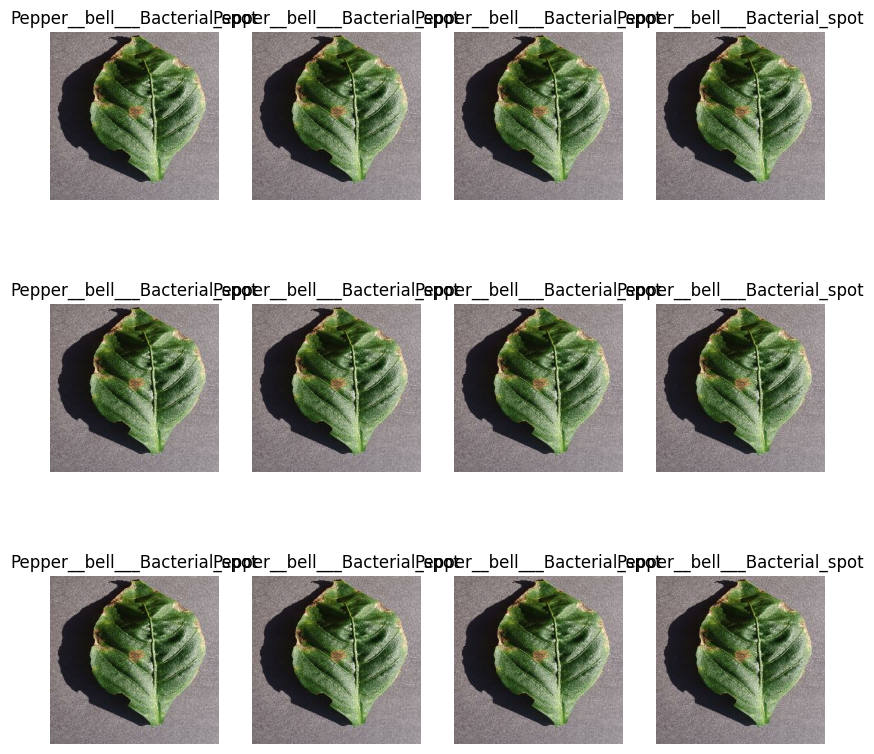

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    # print(image_batch[0].shape)
    print(label_batch.numpy()) # this shows rgb channels which is 2 bcz there is 2 data files ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']
    # print(image_batch[0]) # in tensor
    # print(image_batch[0].numpy()) # in numpy
    plt.figure(figsize=(10,10)) # increase the area b/w the images
    for i in range(12):
      plt.subplot(3,4, i+1)
      plt.imshow(image_batch[0].numpy().astype("uint8"))
      plt.title(class_names[label_batch[0]])
      plt.axis("off")
    

In [8]:
len(dataset)

78

80% ==> trainning 

20 ==> 10% validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

62.400000000000006

In [10]:
train_ds = dataset.take(62)
len(train_ds)

62

In [11]:
test_ds = dataset.skip(62)
len(test_ds)

16

In [12]:
val_size = 0.1
len(dataset)*val_size

7.800000000000001

In [13]:
val_ds = test_ds.take(7)
len(val_ds)

7

In [14]:
test_ds= test_ds.skip(7)
len(test_ds)

9

In [15]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split= 0.1, test_split=0.1, shuffle= True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_size = ds.take(val_size)
    
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

62

In [18]:
len(val_ds)

7

In [19]:
len(test_ds)

9

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [22]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

# Define resize_and_rescale with input_shape
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),
    # layers.Rescaling(1./255) # we did not need bcz our rgb is already in 0 and 1 normalized
])

model = tf.keras.Sequential([
    data_augmentation,  # if used, no input_shape here
    resize_and_rescale, # input_shape defined here
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


c:\Users\devan\.vscode\AI\project7\archive (1)\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer='adam',                         # optimizer to use
    loss='sparse_categorical_crossentropy', # loss function (use this if labels are integers)
    metrics=['accuracy']                      # metrics to monitor
)

In [25]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 487ms/step - accuracy: 0.6578 - loss: 91.0144 - val_accuracy: 0.7366 - val_loss: 0.6466
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 418ms/step - accuracy: 0.7992 - loss: 0.4332 - val_accuracy: 0.7946 - val_loss: 0.5988
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 478ms/step - accuracy: 0.8966 - loss: 0.3376 - val_accuracy: 0.7679 - val_loss: 0.9415
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 446ms/step - accuracy: 0.9335 - loss: 0.2205 - val_accuracy: 0.9018 - val_loss: 0.4240
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 475ms/step - accuracy: 0.9311 - loss: 0.1867 - val_accuracy: 0.8973 - val_loss: 0.5005
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 462ms/step - accuracy: 0.9164 - loss: 0.3126 - val_accuracy: 0.9062 - val_loss: 0.3969
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 479ms/step - accuracy: 0.9169 - loss: 0.2760 - val_accuracy: 0.8750 - val_loss: 0.3181
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 476ms/step - accuracy: 0.9470 - loss: 0.1711 - val_acc

In [26]:
scores = model.evaluate(test_ds)
scores

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9258 - loss: 0.1854


[0.14121957123279572, 0.9400749206542969]

In [27]:
history

In [28]:
history.params
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
len(history.history['accuracy'])

10

In [30]:
history.history['accuracy']

[0.7249108552932739,
 0.8252674341201782,
 0.8904737830162048,
 0.9271523356437683,
 0.9368313550949097,
 0.9317371249198914,
 0.9169638156890869,
 0.9470198750495911,
 0.9546612501144409,
 0.9612837433815002]

In [31]:
len(history.history['loss'])

10

In [32]:
history.history['loss']

[26.140087127685547,
 0.40022334456443787,
 0.3211055397987366,
 0.22183462977409363,
 0.20732459425926208,
 0.23523768782615662,
 0.2962895333766937,
 0.1715661585330963,
 0.156918466091156,
 0.13052436709403992]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

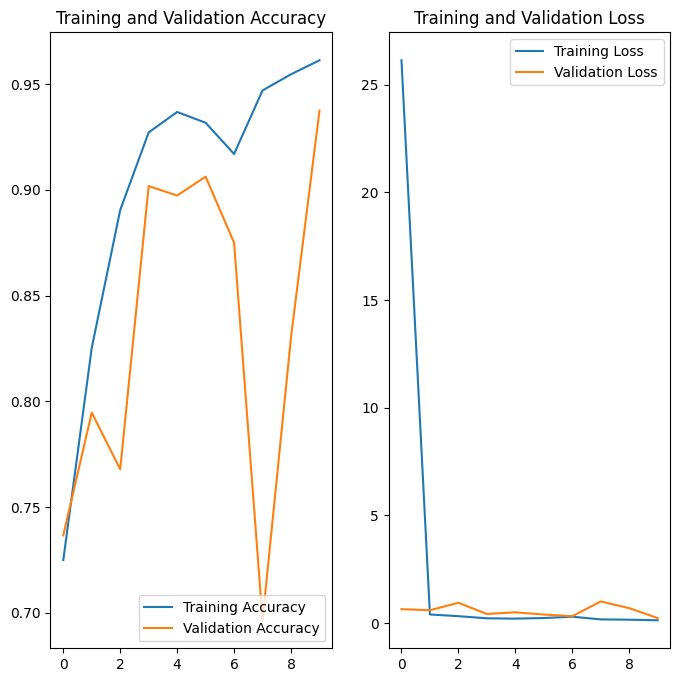

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pepper__bell___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
predicted label: Pepper__bell___healthy


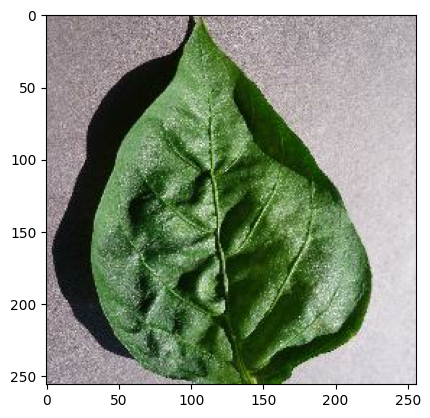

In [35]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [36]:
def predict(model, image):
    img_array = tf.convert_to_tensor(image)  
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    confidence = round(100 * tf.reduce_max(predictions).numpy(), 2)
    predicted_class = class_names[tf.argmax(predictions[0])]
    
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


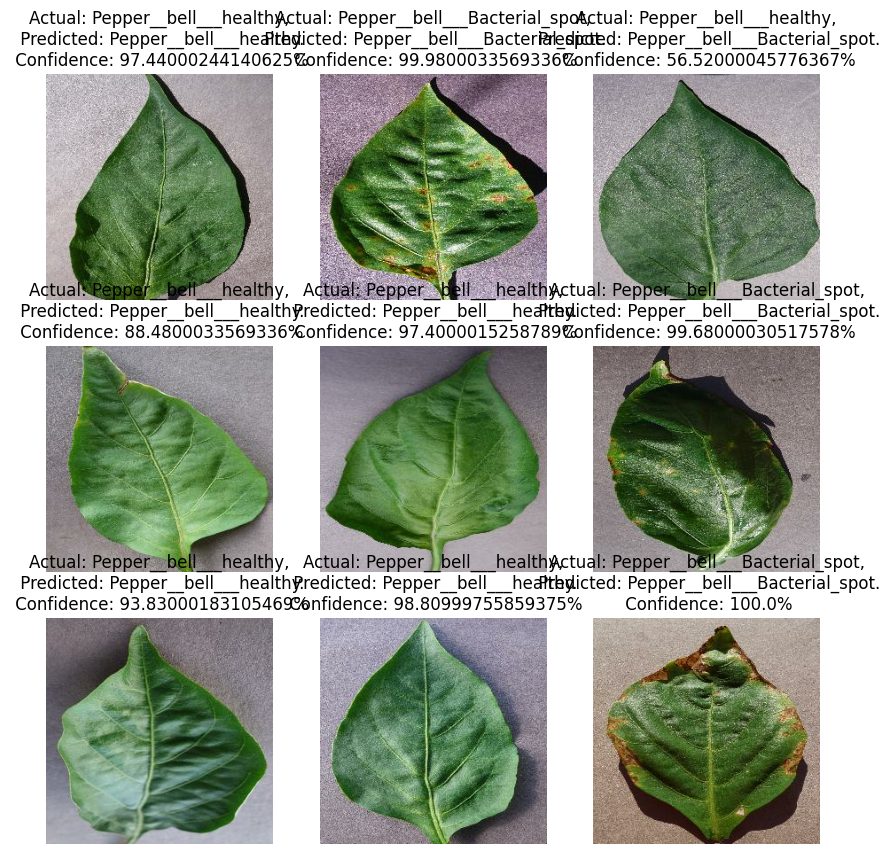

In [37]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
import os

model_dir = 'model'
# Create the folder if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_files = os.listdir(model_dir)
model_versions = []

for file in model_files:
    if file.endswith('.keras') or file.endswith('.h5'):
        version = file.split('.')[0]
        try:
            model_versions.append(int(version))
        except ValueError:
            pass

if model_versions:
    model_version = max(model_versions) + 1
else:
    model_version = 1

print(f"Next model version: {model_version}")

Next model version: 1


In [39]:
model.save("PlantVillage.h5")

In [40]:
model.save("PlantVillage.keras")